## PySpecKit: Discovering the Secrets of Stars
Author: Jasmin Mohammadi

05/09/25

In [1]:
!pip install pyspeckit

In [2]:
import numpy as np
import pyspeckit as spec
import matplotlib.pyplot as plt
from astropy import units as u

In [3]:
data = np.genfromtxt('ngc253_hb.tab')

In [4]:
wavelength = data[:,0]
flux = data[:,1]

5.0


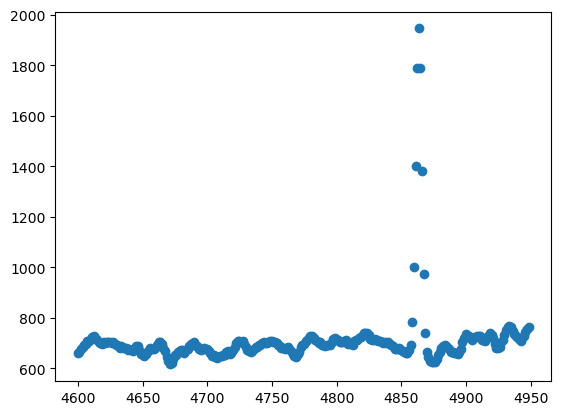

In [5]:
fig, ax = plt.subplots()
ax.scatter(wavelength,flux)

fwhm = 4865.95849609375 - 4860.95849609375
print(fwhm)

27.96099245111078


Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


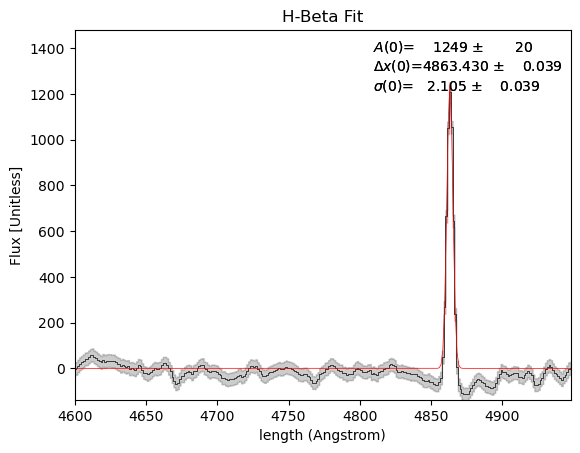

In [6]:
wavelength = data[:,0]
sigma = 10.
center = 50.
flux = data[:,1]

# Add noise
stddev = 0.1
noise_1 = flux[:200]
noise_2 = flux[217:]
noise = np.concatenate((noise_1,noise_2))
error = np.std(noise)
print(error)

error_array = error*np.ones(len(flux))

# this will give a "blank header" warning, which is fine
sp = spec.Spectrum(data=flux, error=error_array, xarr=wavelength,
                        xarrkwargs={'unit':'AA'},
                         unit='Flux [Unitless]')

sp.plotter()

sp.baseline()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = flux.max()
center_guess = 4863.45849609375
width_guess = fwhm
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill', title = 'H-Beta Fit')
sp.specfit.plot_fit()

sp.plotter.savefig('H-Beta Fit.png')

This is a plot showing our fit for the H-Beta line from NGC253, the Sculptor Galaxy. Our gaussian fit is shown in red, the data is the black line, and the grey is the error. On the y-axis we are plotting flux in some unknown units, as noted by the MUSE database, and on the x-axis is wavelength in angstroms. The peak in the plot shows the h-beta line. The error in this data is computed by taking the standard deviation of the continuum and applying that to each point.